In [ ]:
import pandas 
import seaborn
import matplotlib.pyplot as plt 
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipotle_data = pandas.read_csv(url, sep = '\t')
chipotle_data.head()

#What do you observe about this dataset?



,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
#Understanding the Data Structure
chipotle_data.info() #shows data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [5]:
chipotle_data.describe() #provides statistical summaries

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [6]:
chipotle_data.columns 
#lists all column names. Notice that it doesn't have parentheses because it's an attribute
#of the dataframe and not a method that calls a function.


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [7]:
chipotle_data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [63]:
#Cleaning and Converting Data
chipotle_data['item-price'] = chipotle_data['item_price'].replace('[\$]', '', regex=True).astype(float)
#chipotle_data.head()
#dataframe['column name'] is the syntax for accessing the column
#we're doing something to item_price data. what is it?
#why would we do this?

In [12]:
#Creating New Columns
chipotle_data['total_price'] = chipotle_data['item_price'] * chipotle_data['quantity']
#print(chipotle_data)
#we're creating a new column based on existing data
#what does this new column represent?

In [69]:
#Grouping and Summarizing Data

#.groupby() allows you to split data into groups based on the values in the columns
#then apply a function to each group

#for each item name, add up the corresponding quantities.
chipotle_data.groupby('item_name')['quantity'].sum()

#for each item name, take the average of the corresponding quantities. Kind of useless here,
#but here to show you that mean() method exists
#chipotle_data.groupby('item_name')['quantity'].mean()



item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [57]:
#Sorting and Filtering Results

#nlargest(n) with n representing a value shows the top n values
#usually used after grouping and summarizing

#shows the top 20 average quantities of orders. Again, kind of useless. Just for demo. 
top_20 = chipotle_data.groupby('item_name')['quantity'].mean().nlargest(20)
top_20


item_name
Bowl                                     2.000000
Bottled Water                            1.302469
Chips and Tomatillo-Red Chili Salsa      1.250000
Canned Soda                              1.211538
Chips and Fresh Tomato Salsa             1.181818
Canned Soft Drink                        1.166113
Carnitas Crispy Tacos                    1.142857
Veggie Soft Tacos                        1.142857
Chicken Salad Bowl                       1.118182
Barbacoa Crispy Tacos                    1.090909
Chips                                    1.090047
Side of Chips                            1.089109
Nantucket Nectar                         1.074074
Steak Salad Bowl                         1.068966
Chicken Burrito                          1.068716
Chips and Tomatillo-Green Chili Salsa    1.064516
Chicken Crispy Tacos                     1.063830
Chips and Guacamole                      1.056367
Steak Burrito                            1.048913
Chicken Bowl                            

In [21]:
#Other useful pandas methods

# .unique() shows unique values in a column
chipotle_data['item_name'].unique()

# .nunique() counts how many unique entries
chipotle_data['order_id'].nunique()

# use boolean conditions to create subgroups. Example shows items that cost lest than $10
chipotle_data['item_price'] = chipotle_data['item_price'].replace('[\$]', '', regex=True).astype(float)
chipotle_data[chipotle_data['item_price'] > 20]

# .dropna() drops rows with missing data
chipotle_data.dropna()

,order_id,quantity,item_name,choice_description,item_price
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


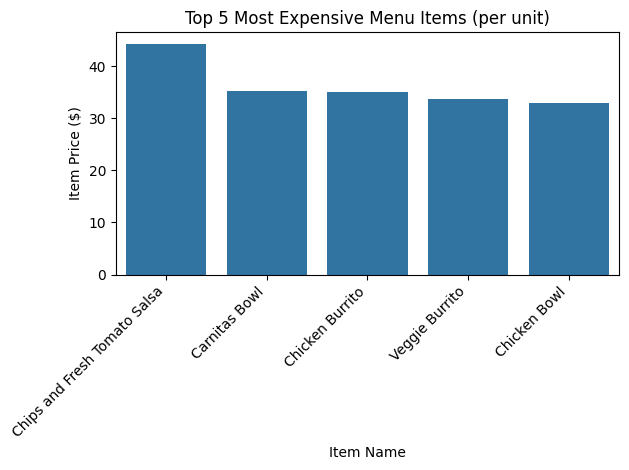

In [22]:
#How to make a bar graph with seaborn example
#Example: Top 5 Most Expensive Menu Items

#Summarize and Group Data
max_prices = chipotle_data.groupby('item_name')['item_price'].max().nlargest(5)

#Convert to DataFrame for seaborn
data = max_prices.reset_index()

#Code Template
seaborn.barplot(x='item_name', y='item_price', data = data)
plt.title("Top 5 Most Expensive Menu Items (per unit)")
plt.xlabel('Item Name')
plt.ylabel("Item Price ($)")
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

#notice what is wrong here?

In [25]:
#why is the most expensive item chips and salsa? any guesses?
top5=chipotle_data.groupby('item_name')['item_price'].max().sort_values(ascending=False).head(5)
top5

item_name
Chips and Fresh Tomato Salsa    44.25
Carnitas Bowl                   35.25
Chicken Burrito                 35.00
Veggie Burrito                  33.75
Chicken Bowl                    32.94
Name: item_price, dtype: float64

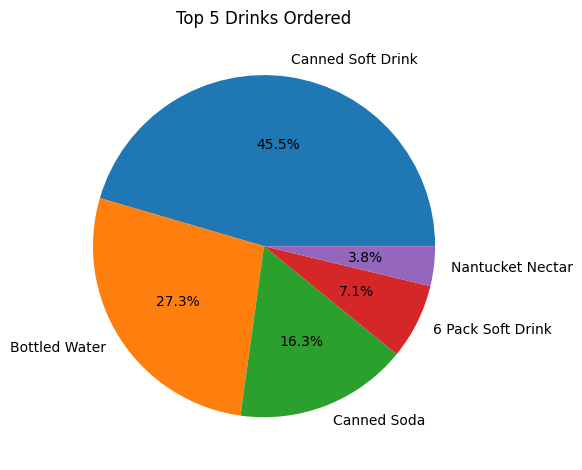

In [6]:
#How to make a pie chart example
#Example: Top 5 most ordered drinks
#Filter only drink items
drinks = chipotle_data[chipotle_data['item_name'].str.contains('Soda|Drink|Water|Nectar|Izze', case=False)]

#Group by item_name and sum quantity
drink_counts = drinks.groupby('item_name')['quantity'].sum().nlargest(5)

# Step 3: Pie chart
plt.pie(drink_counts,labels = drink_counts.index, autopct='%1.1f%%')
plt.title("Top 5 Drinks Ordered")
plt.tight_layout()
plt.show()

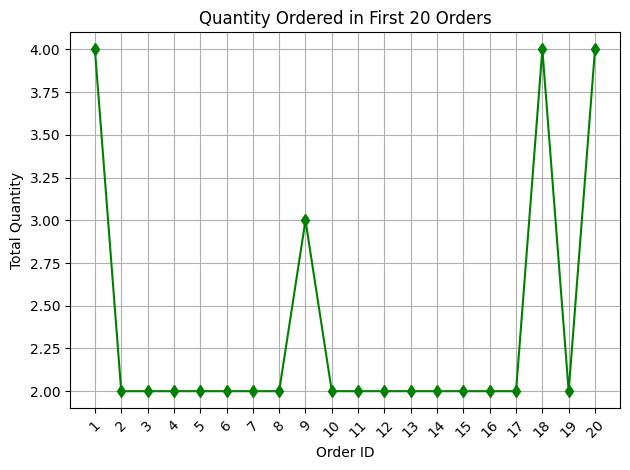

In [12]:
#How to make a line graph example
#Example: The first 20 orders and how many things were in each order

# Group by order_id and sum the quantity ordered
quantity_per_order = chipotle_data.groupby('order_id')['quantity'].sum()

# Select first 20 orders 
first_20_orders = quantity_per_order.head(20)

# Plot line graph
plt.plot(first_20_orders.index, first_20_orders.values, marker='d', linestyle='-', color='green')
plt.grid(True)
plt.title('Quantity Ordered in First 20 Orders')
plt.xlabel('Order ID')
plt.ylabel('Total Quantity')
plt.xticks(first_20_orders.index, rotation=45)
plt.tight_layout()
plt.show()

